In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from df2gspread import gspread2df as g2d
import seaborn as sns

pd.set_option('display.max_rows', 10)

%matplotlib inline

In [2]:
df_sensor_data = pd.read_parquet("../data/Measurements/prepared-datasets/sensor_data_parquet/BATCH=2018-10-09")
df_sensor_data

,Date,Time,Air temp,Humidity,Water level,Water temp,EC,pH,CO2,DO,FILENAME,Time (raw),DT,FILE_TIMESTAMP,PATTERN_NAME,RACK
0,2017-12-21,16:13:31,20.18,31.92,19.0,17.81,0.99,6.05,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:31,2017-12-21 16:13:31,2018-12-21 16:13:00,2,None
1,2017-12-21,16:13:37,19.96,33.67,19.0,17.94,0.95,6.03,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:37,2017-12-21 16:13:37,2018-12-21 16:13:00,2,None
2,2017-12-21,16:14:20,19.94,33.52,42.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:14:20,2017-12-21 16:14:20,2018-12-21 16:13:00,2,None
3,2017-12-21,16:15:20,19.93,33.37,67.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:15:20,2017-12-21 16:15:20,2018-12-21 16:13:00,2,None
4,2017-12-21,16:16:20,19.93,35.50,25.0,17.94,0.99,6.04,NaN,NaN,byspireMonitoring21_12-1613.csv,16:16:20,2017-12-21 16:16:20,2018-12-21 16:13:00,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355844,2018-12-08,23:57:56,23.10,49.70,28.0,21.30,1.50,6.40,521.0,5.8,Rack_5_12_08_2259.csv,23:57:56,2018-12-08 23:57:56,2018-08-12 22:59:00,1,5
355845,2018-12-08,23:58:06,22.00,55.50,26.0,20.20,1.10,6.60,595.0,3.9,Rack_4_12_08_2355.csv,23:58:06,2018-12-08 23:58:06,2018-08-12 23:55:00,1,4
355846,2018-12-08,23:58:56,23.10,49.80,28.0,21.30,1.50,6.40,528.0,5.9,Rack_5_12_08_2259.csv,23:58:56,2018-12-08 23:58:56,2018-08-12 22:59:00,1,5
355847,2018-12-08,23:59:06,22.00,55.20,26.0,20.20,1.10,6.60,590.0,4.0,Rack_4_12_08_2355.csv,23:59:06,2018-12-08 23:59:06,2018-08-12 23:55:00,1,4


# Load up ERP data sources
From [this](https://docs.google.com/spreadsheets/d/1ehmVZ44CIWByLqZMsqfkDkqsG9kwwtRJg7cxVMCRnNE/edit#gid=1027781493) google sheet.

In [21]:
import re

def erp_rack_parser(s):
    resp = {'RACK': None, 'RACK_EXCEPTION': ''}
    try:
        resp['RACK'] = int(re.findall(r'Rack (\d+)', s)[0])
    except Exception as e:
        resp['RACK_EXCEPTION'] = str(e)
    return pd.Series(resp)

def erp_tray_parser(s):
    resp = {'TRAY': None, 'TRAY_EXCEPTION': ''}
    try:
        resp['TRAY'] = int(re.findall(r'Tray (\d+)', s)[0])
    except Exception as e:
        resp['TRAY_EXCEPTION'] = str(e)
    return pd.Series(resp)

## `PLANT` $\rightarrow$ `df_plant`

In [22]:
df_plant_raw = g2d.download('1ehmVZ44CIWByLqZMsqfkDkqsG9kwwtRJg7cxVMCRnNE', wks_name='PLANT', col_names=True)
df_plant_raw

,Date,Plant type,Tray ID,Rack,Level,Position,Seeded (date),Filling rate,Other comments,ID,Last Harvest
0,15.05.2018,Thai basil,Tray 133,Rack 1,Level 1 (bottom),Right,,,,Tray 13343235,
1,15.05.2018,Thai basil,Tray 030,Rack 1,Level 1 (bottom),Center,,,,Tray 03043235,
2,15.05.2018,Thai basil,Tray 141,Rack 1,Level 1 (bottom),Left,,,,Tray 14143235,
3,15.05.2018,Thai basil,Tray 137,Rack 1,Level 2,Center,,,,Tray 13743235,
4,15.05.2018,Thai basil,Tray 134,Rack 1,Level 2,Right,,,,Tray 13443235,
...,...,...,...,...,...,...,...,...,...,...,...
298,,,,,,,,,,,#N/A
299,,,,,,,,,,,#N/A
300,,,,,,,,,,,#N/A
301,,,,,,,,,,,#N/A


In [52]:
# cleanse the ERP data
df_plant = df_plant_raw[df_plant_raw.Rack.notnull() & (~df_plant_raw.Rack.isin(['','NA','#N/A',]))].copy()
df_plant['DATE_PLANTED'] = pd.core.tools.datetimes.to_datetime(df_plant.Date)
df_plant['DATE_SEEDED'] = pd.core.tools.datetimes.to_datetime(df_plant['Seeded (date)'], errors='ignore')
df_plant[['TRAY', 'TRAY_EXCEPTION']] = df_plant['Tray ID'].apply(erp_tray_parser)
df_plant[['RACK', 'RACK_EXCEPTION']] = df_plant['Rack'].apply(erp_rack_parser)
df_plant = df_plant.rename(columns={"Rack": "Rack (raw)"})
df_plant

,Date,Plant type,Tray ID,Rack (raw),Level,Position,Seeded (date),Filling rate,Other comments,ID,Last Harvest,DATE_PLANTED,DATE_SEEDED,TRAY,TRAY_EXCEPTION,RACK,RACK_EXCEPTION
0,15.05.2018,Thai basil,Tray 133,Rack 1,Level 1 (bottom),Right,,,,Tray 13343235,,2018-05-15,,133.0,,1,
1,15.05.2018,Thai basil,Tray 030,Rack 1,Level 1 (bottom),Center,,,,Tray 03043235,,2018-05-15,,30.0,,1,
2,15.05.2018,Thai basil,Tray 141,Rack 1,Level 1 (bottom),Left,,,,Tray 14143235,,2018-05-15,,141.0,,1,
3,15.05.2018,Thai basil,Tray 137,Rack 1,Level 2,Center,,,,Tray 13743235,,2018-05-15,,137.0,,1,
4,15.05.2018,Thai basil,Tray 134,Rack 1,Level 2,Right,,,,Tray 13443235,,2018-05-15,,134.0,,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,10.09.2018,Coriander,Tray xxx,Rack 4,Level 5 (top),Right,28.08.2018,,,Tray xxx43353,#N/A,2018-10-09,28.08.2018,NaN,list index out of range,4,
244,10.09.2018,Coriander,Tray 035,Rack 4,Level 5 (top),Center,28.08.2018,,,Tray 03543353,,2018-10-09,28.08.2018,35.0,,4,
245,10.09.2018,Coriander,Tray 138,Rack 4,Level 5 (top),Left,28.08.2018,,,Tray 13843353,,2018-10-09,28.08.2018,138.0,,4,
246,10.09.2018,Coriander,Tray 108,Rack 4,Level 4,Right,28.08.2018,,,Tray 10843353,,2018-10-09,28.08.2018,108.0,,4,


In [24]:
print(df_plant.RACK.value_counts(dropna=False))
print(df_plant.TRAY.value_counts(dropna=False))

assert df_plant.Date.isnull().sum() == 0

2    79
1    59
4    58
5    52
Name: RACK, dtype: int64
47.0     5
133.0    4
60.0     4
59.0     3
132.0    3
        ..
118.0    1
146.0    1
116.0    1
70.0     1
108.0    1
Name: TRAY, Length: 127, dtype: int64


# `HARVEST` $\rightarrow$ `df_harvest`

In [25]:
df_harvest_raw = g2d.download('1ehmVZ44CIWByLqZMsqfkDkqsG9kwwtRJg7cxVMCRnNE', wks_name='HARVEST', col_names=True)
df_harvest_raw

,Tidsmerke,Customer,Product,Tray ID,Weight of harvest (g),Comment
0,28.03.2018,N/A,Mint ’maroccan’ LBH,Tray 001,615,
1,28.03.2018,N/A,Mint ’maroccan’ LBH,Tray 002,521,
2,06.04.2018,Gutta,Mint ’maroccan’ Kristiansand,Tray 003,528,
3,07.04.2018,Gutta,Basilikum Genovese 'Storbladet',Tray 004,600,
4,07.04.2018,Gutta,Basilikum Genovese 'Storbladet',Tray 005,400,
...,...,...,...,...,...,...
398,15.10.2018,Waste,Leaf parsley,Tray 027,236,
399,16.10.2018,Dyrket.no,Thai basil,Tray 090,40,
400,16.10.2018,Dyrket.no,Leaf parsley,Tray 116,140,
401,17.10.2018,Waste,Thai basil,Tray 090,100,


In [26]:
df_harvest = df_harvest_raw[df_harvest_raw['Tray ID'].notnull() & (~df_harvest_raw['Tray ID'].isin(['','NA','#N/A',]))].copy()
df_harvest['DATE_HARVESTED'] = pd.core.tools.datetimes.to_datetime(df_harvest['Tidsmerke'], errors='coerce')
df_harvest[['TRAY', 'TRAY_EXCEPTION']] = df_harvest['Tray ID'].apply(erp_tray_parser)
df_harvest

,Tidsmerke,Customer,Product,Tray ID,Weight of harvest (g),Comment,DATE_HARVESTED,TRAY,TRAY_EXCEPTION
0,28.03.2018,N/A,Mint ’maroccan’ LBH,Tray 001,615,,2018-03-28,1,
1,28.03.2018,N/A,Mint ’maroccan’ LBH,Tray 002,521,,2018-03-28,2,
2,06.04.2018,Gutta,Mint ’maroccan’ Kristiansand,Tray 003,528,,2018-06-04,3,
3,07.04.2018,Gutta,Basilikum Genovese 'Storbladet',Tray 004,600,,2018-07-04,4,
4,07.04.2018,Gutta,Basilikum Genovese 'Storbladet',Tray 005,400,,2018-07-04,5,
...,...,...,...,...,...,...,...,...,...
398,15.10.2018,Waste,Leaf parsley,Tray 027,236,,2018-10-15,27,
399,16.10.2018,Dyrket.no,Thai basil,Tray 090,40,,2018-10-16,90,
400,16.10.2018,Dyrket.no,Leaf parsley,Tray 116,140,,2018-10-16,116,
401,17.10.2018,Waste,Thai basil,Tray 090,100,,2018-10-17,90,


In [27]:
df_harvest

,Tidsmerke,Customer,Product,Tray ID,Weight of harvest (g),Comment,DATE_HARVESTED,TRAY,TRAY_EXCEPTION
0,28.03.2018,N/A,Mint ’maroccan’ LBH,Tray 001,615,,2018-03-28,1,
1,28.03.2018,N/A,Mint ’maroccan’ LBH,Tray 002,521,,2018-03-28,2,
2,06.04.2018,Gutta,Mint ’maroccan’ Kristiansand,Tray 003,528,,2018-06-04,3,
3,07.04.2018,Gutta,Basilikum Genovese 'Storbladet',Tray 004,600,,2018-07-04,4,
4,07.04.2018,Gutta,Basilikum Genovese 'Storbladet',Tray 005,400,,2018-07-04,5,
...,...,...,...,...,...,...,...,...,...
398,15.10.2018,Waste,Leaf parsley,Tray 027,236,,2018-10-15,27,
399,16.10.2018,Dyrket.no,Thai basil,Tray 090,40,,2018-10-16,90,
400,16.10.2018,Dyrket.no,Leaf parsley,Tray 116,140,,2018-10-16,116,
401,17.10.2018,Waste,Thai basil,Tray 090,100,,2018-10-17,90,


In [28]:
print(df_harvest.TRAY_EXCEPTION.value_counts())
print(df_harvest.DATE_HARVESTED.isnull().value_counts())

    392
Name: TRAY_EXCEPTION, dtype: int64
False    391
True       1
Name: DATE_HARVESTED, dtype: int64


# Join out datasets

In [11]:
# reach for spark here to do some sql joins
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql import functions as sqlfun
from pyspark.sql import types as sqxt
spark = SparkSession.builder\
    .master('local[4]')\
    .appName('vfa-01-01')\
    .getOrCreate()
spark

In [31]:
df_sensor_data

,Date,Time,Air temp,Humidity,Water level,Water temp,EC,pH,CO2,DO,FILENAME,Time (raw),DT,FILE_TIMESTAMP,PATTERN_NAME,RACK
0,2017-12-21,16:13:31,20.18,31.92,19.0,17.81,0.99,6.05,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:31,2017-12-21 16:13:31,2018-12-21 16:13:00,2,None
1,2017-12-21,16:13:37,19.96,33.67,19.0,17.94,0.95,6.03,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:37,2017-12-21 16:13:37,2018-12-21 16:13:00,2,None
2,2017-12-21,16:14:20,19.94,33.52,42.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:14:20,2017-12-21 16:14:20,2018-12-21 16:13:00,2,None
3,2017-12-21,16:15:20,19.93,33.37,67.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:15:20,2017-12-21 16:15:20,2018-12-21 16:13:00,2,None
4,2017-12-21,16:16:20,19.93,35.50,25.0,17.94,0.99,6.04,NaN,NaN,byspireMonitoring21_12-1613.csv,16:16:20,2017-12-21 16:16:20,2018-12-21 16:13:00,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355844,2018-12-08,23:57:56,23.10,49.70,28.0,21.30,1.50,6.40,521.0,5.8,Rack_5_12_08_2259.csv,23:57:56,2018-12-08 23:57:56,2018-08-12 22:59:00,1,5
355845,2018-12-08,23:58:06,22.00,55.50,26.0,20.20,1.10,6.60,595.0,3.9,Rack_4_12_08_2355.csv,23:58:06,2018-12-08 23:58:06,2018-08-12 23:55:00,1,4
355846,2018-12-08,23:58:56,23.10,49.80,28.0,21.30,1.50,6.40,528.0,5.9,Rack_5_12_08_2259.csv,23:58:56,2018-12-08 23:58:56,2018-08-12 22:59:00,1,5
355847,2018-12-08,23:59:06,22.00,55.20,26.0,20.20,1.10,6.60,590.0,4.0,Rack_4_12_08_2355.csv,23:59:06,2018-12-08 23:59:06,2018-08-12 23:55:00,1,4


In [53]:
ddf_harvest = spark.createDataFrame(df_harvest)
ddf_harvest.registerTempTable("HARVEST")
ddf_plant = spark.createDataFrame(df_plant)
ddf_plant.registerTempTable("PLANT")
#ddf_sensor = spark.createDataFrame(df_sensor_data)
#ddf_sensor.registerTempTable("SENSOR")

In [87]:
# Check the number of racks that a tray has appeared in...

spark.sql("""
select TRAY, count(distinct RACK) as NRACKS_PER_TRAY
from PLANT
group by TRAY
""").toPandas().set_index("TRAY").NRACKS_PER_TRAY.value_counts()

1    88
2    32
3     6
4     1
Name: NRACKS_PER_TRAY, dtype: int64

In [69]:
ddf_harvest_total = spark.sql("""
select
    DATE_HARVESTED,
    TRAY,
    PRODUCT,
    sum(cast(`Weight of harvest (g)` as float)) as TOTAL_WEIGHT
from HARVEST
group by
    DATE_HARVESTED,
    TRAY,
    PRODUCT
""")
ddf_harvest_total.registerTempTable("HARVEST_TOTAL")
ddf_harvest_total.show(10)

+-------------------+----+----------------+------------+
|     DATE_HARVESTED|TRAY|         PRODUCT|TOTAL_WEIGHT|
+-------------------+----+----------------+------------+
|2018-04-07 00:00:00| 116|            Mint|        30.0|
|2018-11-04 00:00:00|  22|    Leaf parsley|        44.0|
|2018-05-24 00:00:00|  58|Coriander Marino|       719.0|
|2018-09-27 00:00:00|  14|    Leaf parsley|       624.0|
|2018-06-28 00:00:00|  19|            Mint|       242.0|
|2018-03-07 00:00:00| 141|      Thai basil|      1482.0|
|2018-06-28 00:00:00|  93|       Coriander|       273.0|
|2018-08-16 00:00:00|  31|            Mint|       250.0|
|2018-08-31 00:00:00| 151|         Ruccola|       699.0|
|2018-08-23 00:00:00| 104|            Mint|       669.0|
+-------------------+----+----------------+------------+
only showing top 10 rows



In [94]:
ddf_lifetime = spark.sql("""
select
    P.DATE_PLANTED,
    H.DATE_HARVESTED,
    H.TRAY,
    P.RACK,
    datediff(H.DATE_HARVESTED, P.DATE_PLANTED) as DAYS_GROWTH,
    H.TOTAL_WEIGHT,
    row_number() over (
        partition by P.DATE_PLANTED, P.TRAY, P.RACK
        order by datediff(H.DATE_HARVESTED, P.DATE_PLANTED) asc
    ) as ROWN,
    P.`Plant type`,
    H.`Product`
from HARVEST_TOTAL as H
inner join PLANT as P on 
    H.DATE_HARVESTED > P.DATE_PLANTED and
    H.TRAY = P.TRAY
""")
ddf_lifetime

DataFrame[DATE_PLANTED: timestamp, DATE_HARVESTED: timestamp, TRAY: bigint, RACK: bigint, DAYS_GROWTH: int, TOTAL_WEIGHT: double, ROWN: int, Plant type: string, Product: string]

In [105]:
ddf_lifetime.orderBy("TRAY", "DATE_PLANTED", "ROWN").show(60)

+-------------------+-------------------+----+----+-----------+------------+----+------------+--------------------+
|       DATE_PLANTED|     DATE_HARVESTED|TRAY|RACK|DAYS_GROWTH|TOTAL_WEIGHT|ROWN|  Plant type|             Product|
+-------------------+-------------------+----+----+-----------+------------+----+------------+--------------------+
|2018-01-10 00:00:00|2018-06-04 00:00:00|   3|   2|        145|       528.0|   1|   Coriander|Mint ’maroccan’ K...|
|2018-01-10 00:00:00|2018-09-27 00:00:00|   3|   2|        260|       580.0|   2|   Coriander|           Coriander|
|2018-01-10 00:00:00|2018-11-06 00:00:00|   3|   2|        300|       657.0|   3|   Coriander|                Mint|
|2018-06-29 00:00:00|2018-09-27 00:00:00|   3|   2|         90|       580.0|   1|Leaf parsley|           Coriander|
|2018-06-29 00:00:00|2018-11-06 00:00:00|   3|   2|        130|       657.0|   2|Leaf parsley|                Mint|
|2018-08-21 00:00:00|2018-09-27 00:00:00|   3|   2|         37|       58

In [96]:
ddf_lifetime.filter("ROWN=1").show(20)

+-------------------+-------------------+----+----+-----------+------------+----+------------+----------------+
|       DATE_PLANTED|     DATE_HARVESTED|TRAY|RACK|DAYS_GROWTH|TOTAL_WEIGHT|ROWN|  Plant type|         Product|
+-------------------+-------------------+----+----+-----------+------------+----+------------+----------------+
|2018-05-09 00:00:00|2018-08-30 00:00:00|  70|   4|        113|       438.0|   1|   Coriander|            Mint|
|2018-02-07 00:00:00|2018-04-10 00:00:00|   7|   2|         62|       813.0|   1|  Thai basil|       Coriander|
|2018-07-30 00:00:00|2018-08-16 00:00:00| 112|   5|         17|       145.0|   1|        Mint|            Mint|
|2018-09-25 00:00:00|2018-11-10 00:00:00| 112|   5|         46|       100.0|   1|  Thai basil|      Thai basil|
|2018-01-10 00:00:00|2018-09-27 00:00:00| 128|   2|        260|       489.0|   1|   Coriander|       Coriander|
|2018-08-06 00:00:00|2018-09-27 00:00:00| 128|   2|         52|       489.0|   1|Leaf parsley|       Cor

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f1a8b38>]],
      dtype=object)

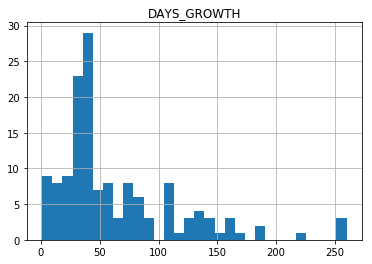

In [103]:
ddf_lifetime.filter("ROWN=1").select("DAYS_GROWTH").toPandas().hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f0e3278>]],
      dtype=object)

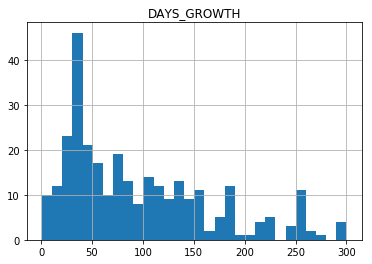

In [100]:
ddf_lifetime.select("DAYS_GROWTH").toPandas().hist(bins=30)

# Early checks


In [107]:
df_lifetimes = ddf_lifetime.filter("ROWN=1").toPandas()
df_lifetimes

,DATE_PLANTED,DATE_HARVESTED,TRAY,RACK,DAYS_GROWTH,TOTAL_WEIGHT,ROWN,Plant type,Product
0,2018-05-09,2018-08-30,70,4,113,438.0,1,Coriander,Mint
1,2018-02-07,2018-04-10,7,2,62,813.0,1,Thai basil,Coriander
2,2018-07-30,2018-08-16,112,5,17,145.0,1,Mint,Mint
3,2018-09-25,2018-11-10,112,5,46,100.0,1,Thai basil,Thai basil
4,2018-01-10,2018-09-27,128,2,260,489.0,1,Coriander,Coriander
...,...,...,...,...,...,...,...,...,...
138,2018-07-08,2018-09-17,43,2,71,473.0,1,Coriander,Coriander
139,2018-02-07,2018-04-09,90,2,61,74.0,1,Thai basil,Thai basil
140,2018-07-08,2018-07-09,90,4,1,90.0,1,Thai basil,Thai basil
141,2018-09-18,2018-10-16,90,5,28,40.0,1,Thai basil,Thai basil


/opt/conda/envs/vfa-01/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


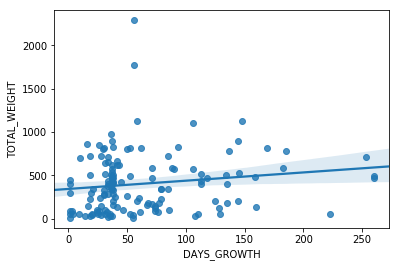

In [112]:
sns.regplot(x=df_lifetimes.DAYS_GROWTH, y=df_lifetimes.TOTAL_WEIGHT)

/opt/conda/envs/vfa-01/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


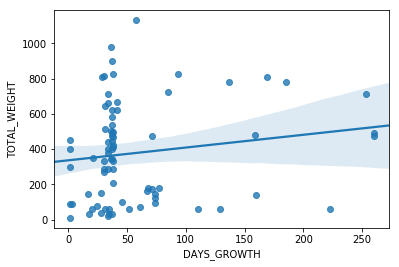

In [114]:
# what if we are a bit stricter on the data...
df_lifetimes_exact = df_lifetimes[df_lifetimes['Product']==df_lifetimes['Plant type']]
sns.regplot(x=df_lifetimes_exact.DAYS_GROWTH, y=df_lifetimes_exact.TOTAL_WEIGHT)